# Case interview: Wind Power Forecast in Denmark - Data wrangling

# Task 

Make a wind model for wind power production in one or both of the two price zones in Denmark (DK1 and DK2) based on the wind and temperature data given in the file WindData.csv (Attached). The file WindData.csv contains actual production for the two Danish price zones, forecasted wind speed (WND) and wind direction (DD) from several points in Denmark. Your task is to make a model based on the historical data.

#### Load python packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=15,10

#### Import the data

In [2]:
base_dir = os.path.dirname(os.getcwd())
filename = os.path.join(base_dir,"data","WindData.csv")

In [3]:
df = pd.read_csv(filename)
df.head()

,Date,Wind Production DK1,Wind Production DK2,Station1_WND,Station1_DD,Station2_WND,Station2_DD,Station3_WND,Station3_DD,Station4_WND,...,Station8_WND,Station8_DD,Station9_WND,Station9_DD,Station10_WND,Station10_DD,Station11_WND,Station11_DD,Station12_WND,Station12_DD
0,01/01/2016 00:00,1396.847852,122.705532,9.6,191,6.1,179.0,7.0,224.0,8.4,...,12.4,199.0,7.7,228,6.1,195,5.7,184,10.2,202
1,01/01/2016 01:00,1304.469541,105.147667,9.8,188,6.1,177.0,6.6,227.0,8.3,...,13.2,197.0,7.3,231,6.0,193,5.3,185,10.7,200
2,01/01/2016 02:00,1201.416846,80.806082,9.9,188,6.6,174.0,6.3,231.0,8.3,...,13.4,197.0,6.9,235,6.3,193,5.3,188,10.4,199
3,01/01/2016 03:00,1198.324268,67.637683,10.0,187,7.1,172.0,6.0,234.0,8.4,...,13.6,197.0,6.6,239,6.7,193,5.2,191,10.1,197
4,01/01/2016 04:00,1113.926804,51.576228,9.8,188,7.5,172.0,6.1,232.0,8.5,...,13.0,202.0,6.4,237,7.0,193,4.8,195,9.7,197


#### Adjusting the index

In [4]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y %H:%M")
df = df.set_index("Date").sort_index()

#### Checking the columns

In [5]:
for i, col in enumerate(df.columns):
    print(i+1, col)

1 Wind Production DK1
2 Wind Production DK2
3 Station1_WND
4 Station1_DD
5 Station2_WND
6 Station2_DD
7 Station3_WND
8 Station3_DD
9 Station4_WND
10 Station4_DD
11 Station5_WND
12 Station5_DD
13 Station6_WND
14 Station6_DD
15 Station7_WND
16 Station7_DD
17 Station8_WND
18 Station8_DD
19 Station9_WND
20 Station9_DD
21 Station10_WND
22 Station10_DD
23 Station11_WND
24 Station11_DD
25 Station12_WND
26 Station12_DD


#### Grouping the columns by category

In [6]:
col_actual_prod = df.groupby(by = lambda x: "Wind Production" in x, axis=1).groups[True]
col_wind_speed = df.groupby(by = lambda x: "WND" in x, axis=1).groups[True]
col_wind_dir = df.groupby(by = lambda x: "DD" in x, axis=1).groups[True]

#### Checking the first 5 rows

In [7]:
df[col_wind_dir].head()

,Station1_DD,Station2_DD,Station3_DD,Station4_DD,Station5_DD,Station6_DD,Station7_DD,Station8_DD,Station9_DD,Station10_DD,Station11_DD,Station12_DD
Date,,,,,,,,,,,,
2016-01-01 00:00:00,191,179.0,224.0,198.0,197,205,202.0,199.0,228,195,184,202
2016-01-01 01:00:00,188,177.0,227.0,192.0,193,204,205.0,197.0,231,193,185,200
2016-01-01 02:00:00,188,174.0,231.0,183.0,189,203,205.0,197.0,235,193,188,199
2016-01-01 03:00:00,187,172.0,234.0,173.0,185,202,206.0,197.0,239,193,191,197
2016-01-01 04:00:00,188,172.0,232.0,171.0,185,201,203.0,202.0,237,193,195,197


#### Checking the last 5 rows

In [8]:
df[col_wind_dir].tail()

,Station1_DD,Station2_DD,Station3_DD,Station4_DD,Station5_DD,Station6_DD,Station7_DD,Station8_DD,Station9_DD,Station10_DD,Station11_DD,Station12_DD
Date,,,,,,,,,,,,
2016-12-31 19:00:00,250,249.0,244.0,248.0,247,247,250.0,255.0,239,251,254,244
2016-12-31 20:00:00,250,248.0,244.0,247.0,246,246,248.0,253.0,240,250,253,245
2016-12-31 21:00:00,249,247.0,244.0,246.0,245,246,246.0,252.0,241,248,252,246
2016-12-31 22:00:00,249,248.0,245.0,247.0,245,246,245.0,251.0,242,247,252,246
2016-12-31 23:00:00,248,250.0,245.0,247.0,245,246,244.0,250.0,242,247,253,246


### Statistics for actual production

In [9]:
df[col_actual_prod].describe()

,Wind Production DK1,Wind Production DK2
count,8784.000000,8784.000000
mean,1162.437709,288.642360
std,908.702127,257.684412
min,0.600037,0.100006
25%,409.054641,72.340919
50%,956.661949,203.054467
75%,1736.294405,464.510271
max,3699.429762,999.842479


8784 hours in the year 2016 reveals that it was a leap year.

In [10]:
df[col_actual_prod].corr()

,Wind Production DK1,Wind Production DK2
Wind Production DK1,1.000000,0.825948
Wind Production DK2,0.825948,1.000000


<Figure size 1080x720 with 0 Axes>

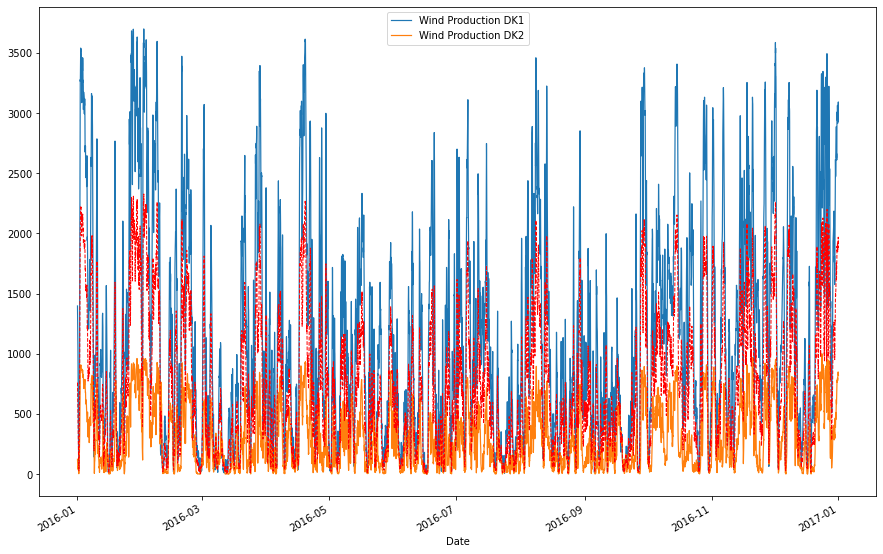

In [11]:
plt.figure()
ax = df[col_actual_prod].plot(linewidth=1.2)
ax.plot(df[col_actual_prod].mean(1), linestyle = "--", linewidth = 1, color = "r")

### Statistics for wind speed

In [12]:
df[col_wind_speed].describe()

,Station1_WND,Station2_WND,Station3_WND,Station4_WND,Station5_WND,Station6_WND,Station7_WND,Station8_WND,Station9_WND,Station10_WND,Station11_WND,Station12_WND
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,7.860189,6.932440,7.333242,7.498406,7.014635,7.375085,8.898719,9.426719,8.633054,7.231831,7.202920,7.450916
std,3.374270,2.986421,3.176724,3.168012,2.865125,3.088878,3.919591,4.284836,3.771127,2.951645,3.058852,3.330041
min,0.700000,0.500000,0.500000,0.400000,0.600000,0.400000,0.500000,0.600000,0.600000,0.700000,0.600000,0.500000
25%,5.600000,4.800000,5.000000,5.400000,5.100000,5.200000,6.000000,6.400000,5.800000,5.200000,5.000000,5.100000
50%,7.600000,6.700000,7.100000,7.300000,6.800000,7.100000,8.700000,9.200000,8.400000,7.100000,6.900000,7.200000
75%,9.700000,8.600000,9.300000,9.300000,8.600000,9.300000,11.400000,12.000000,11.100000,8.925000,9.200000,9.300000
max,25.100000,24.700000,20.800000,24.200000,21.500000,21.800000,28.600000,28.200000,24.500000,22.700000,23.300000,23.000000


In [13]:
df[col_wind_speed].corr()

,Station1_WND,Station2_WND,Station3_WND,Station4_WND,Station5_WND,Station6_WND,Station7_WND,Station8_WND,Station9_WND,Station10_WND,Station11_WND,Station12_WND
Station1_WND,1.000000,0.852941,0.750631,0.970488,0.925035,0.858103,0.787044,0.883449,0.695869,0.902575,0.745088,0.914568
Station2_WND,0.852941,1.000000,0.692005,0.924128,0.889827,0.788809,0.878559,0.685545,0.626163,0.899730,0.785983,0.745170
Station3_WND,0.750631,0.692005,1.000000,0.733739,0.822740,0.905835,0.746311,0.756422,0.959153,0.815947,0.839742,0.814243
Station4_WND,0.970488,0.924128,0.733739,1.000000,0.937116,0.850287,0.834855,0.814680,0.676173,0.925315,0.766153,0.858488
Station5_WND,0.925035,0.889827,0.822740,0.937116,1.000000,0.936663,0.869590,0.828934,0.765393,0.990397,0.844450,0.888141
Station6_WND,0.858103,0.788809,0.905835,0.850287,0.936663,1.000000,0.831901,0.831319,0.855174,0.929223,0.864383,0.892542
Station7_WND,0.787044,0.878559,0.746311,0.834855,0.869590,0.831901,1.000000,0.696723,0.692120,0.897948,0.883140,0.742478
Station8_WND,0.883449,0.685545,0.756422,0.814680,0.828934,0.831319,0.696723,1.000000,0.713674,0.800226,0.689848,0.945238
Station9_WND,0.695869,0.626163,0.959153,0.676173,0.765393,0.855174,0.692120,0.713674,1.000000,0.757983,0.798508,0.756807
Station10_WND,0.902575,0.899730,0.815947,0.925315,0.990397,0.929223,0.897948,0.800226,0.757983,1.000000,0.865674,0.855995


<Figure size 1080x720 with 0 Axes>

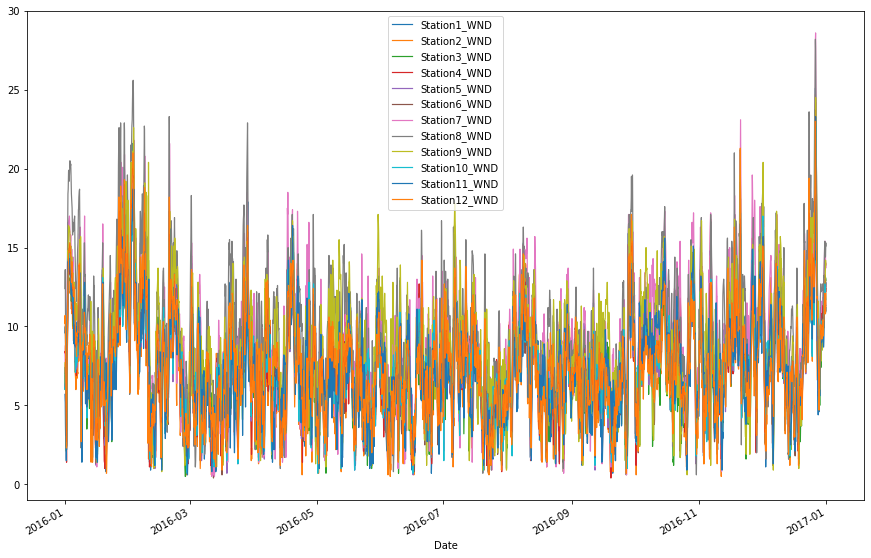

In [14]:
plt.figure()
ax = df[col_wind_speed].plot(linewidth=1.2)
ax.plot(df[col_wind_speed].mean(1), linestyle = "--", linewidth = 0.1, color = "r")

### Statistics for wind direction

In [15]:
df[col_wind_dir].describe()

,Station1_DD,Station2_DD,Station3_DD,Station4_DD,Station5_DD,Station6_DD,Station7_DD,Station8_DD,Station9_DD,Station10_DD,Station11_DD,Station12_DD
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,193.546676,192.692908,197.246414,191.065631,195.450023,195.274476,195.669114,201.414561,198.022883,196.415870,197.733720,196.087546
std,91.412243,88.837027,89.883025,90.134816,89.421554,87.630373,88.809750,93.147626,89.403650,89.540418,89.771357,91.949234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.000000,118.000000,119.000000,113.000000,123.000000,122.000000,126.000000,119.000000,117.000000,126.000000,122.000000,114.000000
50%,208.000000,209.000000,220.000000,207.000000,212.000000,214.000000,210.000000,217.000000,220.000000,213.000000,217.000000,212.000000
75%,270.000000,265.000000,267.000000,266.000000,268.000000,265.000000,264.000000,278.000000,270.000000,269.000000,268.000000,274.000000
max,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000


In [16]:
df[col_wind_dir].corr()

,Station1_DD,Station2_DD,Station3_DD,Station4_DD,Station5_DD,Station6_DD,Station7_DD,Station8_DD,Station9_DD,Station10_DD,Station11_DD,Station12_DD
Station1_DD,1.000000,0.790285,0.640870,0.900906,0.808398,0.730201,0.739137,0.795327,0.602519,0.778066,0.656481,0.807706
Station2_DD,0.790285,1.000000,0.578404,0.847101,0.747491,0.663799,0.805073,0.667502,0.556520,0.763953,0.670160,0.678520
Station3_DD,0.640870,0.578404,1.000000,0.622623,0.707902,0.788262,0.624608,0.670656,0.901223,0.693191,0.735888,0.716050
Station4_DD,0.900906,0.847101,0.622623,1.000000,0.815857,0.720621,0.755720,0.731645,0.581747,0.810576,0.656035,0.738923
Station5_DD,0.808398,0.747491,0.707902,0.815857,1.000000,0.844627,0.747458,0.713095,0.685711,0.921432,0.727019,0.775317
Station6_DD,0.730201,0.663799,0.788262,0.720621,0.844627,1.000000,0.671238,0.703857,0.773881,0.833005,0.733024,0.759403
Station7_DD,0.739137,0.805073,0.624608,0.755720,0.747458,0.671238,1.000000,0.664931,0.597029,0.762197,0.728277,0.672193
Station8_DD,0.795327,0.667502,0.670656,0.731645,0.713095,0.703857,0.664931,1.000000,0.637945,0.676975,0.649308,0.860240
Station9_DD,0.602519,0.556520,0.901223,0.581747,0.685711,0.773881,0.597029,0.637945,1.000000,0.670045,0.711017,0.678169
Station10_DD,0.778066,0.763953,0.693191,0.810576,0.921432,0.833005,0.762197,0.676975,0.670045,1.000000,0.727037,0.725199


<Figure size 1080x720 with 0 Axes>

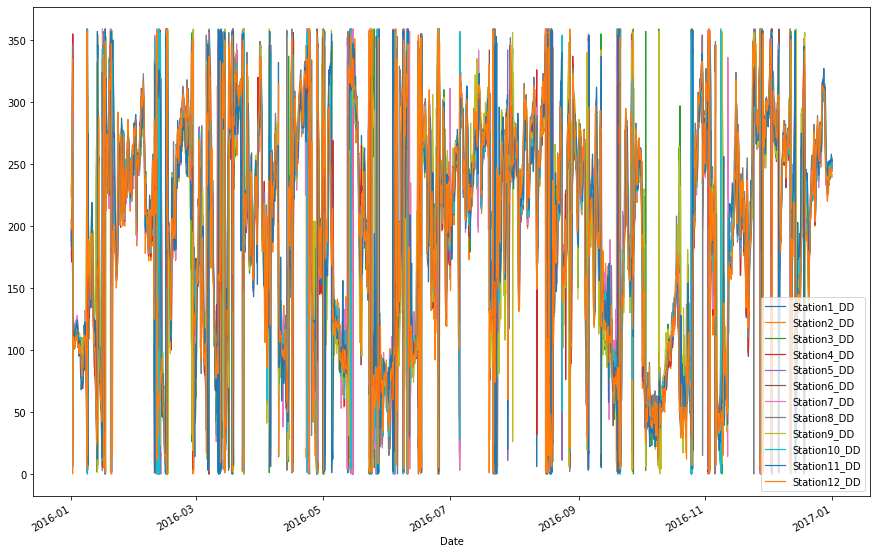

In [17]:
plt.figure()
ax = df[col_wind_dir].plot(linewidth=1.2)
ax.plot(df[col_wind_dir].mean(1), linestyle = "--", linewidth = 0.1, color = "r")